# Listing 2-1. Import TensorFlow and numpy Library

In [1]:
import tensorflow as tf
import numpy as np


# Listing 2-2.Activate a TensorFlow Interactive Session 

In [2]:
tf.InteractiveSession() 

# Listing 2-3. Defining Tensors 

In [3]:
a = tf.zeros((2,2));
b = tf.ones((2,2)) 

# Listing 2-4. Sum the elements of the matrix (2D Tensor) across the horizontal axis 

In [4]:
tf.reduce_sum(b,reduction_indices = 1).eval() 

array([ 2.,  2.], dtype=float32)

# Listing 2-5. Check the shape of the Tensor 

In [5]:
a.get_shape() 

TensorShape([Dimension(2), Dimension(2)])

# Listing 2-6. Reshaping a Tensor 

In [6]:
tf.reshape(a,(1,4)).eval() 

array([[ 0.,  0.,  0.,  0.]], dtype=float32)

# Listing 2-7. Explicit evaluation in TensorFlow and difference with Numpy

In [7]:
ta = tf.zeros((2,2))
print(ta) 

Tensor("zeros_1:0", shape=(2, 2), dtype=float32)


In [8]:
print(ta.eval()) 

[[ 0.  0.]
 [ 0.  0.]]


In [9]:
a = np.zeros((2,2))
print(a) 

[[ 0.  0.]
 [ 0.  0.]]


# Listing 2-8.Defining TensorFlow Constants 

In [10]:
a = tf.constant(1)
b = tf.constant(5)
c= a*b 

# Listing 2-9. TensorFlow Sesssion for executive of the Commands through Run and Eval 

In [12]:
with tf.Session() as sess:
    print(c.eval())
    print(sess.run(c)) 

5
5


# Listing 2-10a.Defining TensorFlow variables 

In [29]:
w = tf.ones((2,2),name='weights')


# Listing 2-10b.Initializing the variables after invoking the Session 

In [30]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w)) 

[[ 1.  1.]
 [ 1.  1.]]


# Listing 2-11a.Defining the TensorFlow Variable with random initial values from Standard Normal Distribution 

In [32]:
rw = tf.Variable(tf.random_normal((2,2)),name='random_weights') 

# Listing 2-11b.Invoking Session and displaying the Initial State of the variable 

In [33]:
with tf.Session()as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(rw)) 

[[ 1.01376367  2.30987906]
 [ 0.0666444  -0.29094756]]


# Listing 2-12.TensorFlow Variable State Update 

In [35]:
var_1 = tf.Variable(0,name='var_1')
add_op = tf.add(var_1,tf.constant(1))
upd_op = tf.assign(var_1,add_op)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in xrange(5):
        print(sess.run(upd_op)) 

1
2
3
4
5


# Listing 2-13. Displaying the TensorFlow Variable State 

In [36]:
x = tf.constant(1)
y = tf.constant(5)
z = tf.constant(7)
mul_x_y = x*y
final_op = mul_x_y + z
with tf.Session() as sess:
    print(sess.run([mul_x_y,final_op])) 

[5, 12]


# Listing 2-14.Converting a Numpy array to Tensor 

In [37]:
a = np.ones((3,3))
b = tf.convert_to_tensor(a)
with tf.Session() as sess:
    print(sess.run(b)) 

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


# Listing 2-15.PlaceHolders and Feed Dictionary 

In [38]:
inp1 = tf.placeholder(tf.float32,shape=(1,2))
inp2 = tf.placeholder(tf.float32,shape=(2,1))
output = tf.matmul(inp1,inp2)
with tf.Session() as sess:
    print(sess.run([output],feed_dict={inp1:[[1.,3.]],inp2:[[1],[3]]})) 

[array([[ 10.]], dtype=float32)]


# Listing 2-16 . XOR implementation with Hidden layers having sigmoid activation functions. 

In [4]:
#----------------------------------------------------------------------------------------------
#XOR  implementation in Tensorflow with hidden layers being sigmoid to introduce Non-Linearity
#----------------------------------------------------------------------------------------------
import tensorflow as tf
#----------------------------------------------------------------------------------------------
# Create placeholders for training input and output labels
#----------------------------------------------------------------------------------------------
x_ = tf.placeholder(tf.float32, shape=[4,2], name="x-input")
y_ = tf.placeholder(tf.float32, shape=[4,1], name="y-input")
#----------------------------------------------------------------------------------------------
#Define the weights to the hidden and output layerrespectively. 
#----------------------------------------------------------------------------------------------
w1 = tf.Variable(tf.random_uniform([2,2], -1, 1), name="Weights1")
w2 = tf.Variable(tf.random_uniform([2,1], -1, 1), name="Weights2")
#----------------------------------------------------------------------------------------------
# Define the bias to the hidden and output layers respectively
#----------------------------------------------------------------------------------------------
b1 = tf.Variable(tf.zeros([2]), name="Bias1")
b2 = tf.Variable(tf.zeros([1]), name="Bias2")
#----------------------------------------------------------------------------------------------
# Define the final output through forward pass
#----------------------------------------------------------------------------------------------
z2 = tf.sigmoid(tf.matmul(x_, w1) + b1)
pred = tf.sigmoid(tf.matmul(z2,w2) + b2)
#----------------------------------------------------------------------------------------------
#Define the Cross-entropy/Log-loss Cost function based on the output label y and the predicted 
#probability by the forward pass
#----------------------------------------------------------------------------------------------
cost = tf.reduce_mean(( (y_ * tf.log(pred)) + 
        ((1 - y_) * tf.log(1.0 - pred)) ) * -1)
learning_rate = 0.01
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
#----------------------------------------------------------------------------------------------
#Now that we have all that we need set up we will start the training
#----------------------------------------------------------------------------------------------
XOR_X = [[0,0],[0,1],[1,0],[1,1]]
XOR_Y = [[0],[1],[1],[0]]

init = tf.initialize_all_variables()
sess = tf.Session()
writer = tf.summary.FileWriter("./Downloads/XOR1_logs", sess.graph_def)

sess.run(init)
for i in range(100000):
        sess.run(train_step, feed_dict={x_: XOR_X, y_: XOR_Y})
        if i % 10000 == 0:
            print('Epoch ', i)
            print('Prediction:', sess.run(pred,feed_dict={x_: XOR_X, y_: XOR_Y}))
            print('Weights from input to hidden layer:', sess.run(w1))
            print('Bias in the hidden layer:', sess.run(b1))
            print('Weights from hidden layer to output layer:', sess.run(w2))
            print('Bias in the output layer:', sess.run(b2))
            print('Cost:', sess.run(cost, feed_dict={x_: XOR_X, y_: XOR_Y}))
#----------------------------------------------------------------------------------------------        
print('Final Prediction', sess.run(pred, feed_dict={x_: XOR_X, y_: XOR_Y}))
#----------------------------------------------------------------------------------------------

Instructions for updating:
Use `tf.global_variables_initializer` instead.
('Epoch ', 0)
('Prediction:', array([[ 0.64893764],
       [ 0.59689724],
       [ 0.65669155],
       [ 0.60471165]], dtype=float32))
('Weights from input to hidden layer:', array([[ 0.33330926, -0.06977983],
       [-0.74415874, -0.76291597]], dtype=float32))
('Bias in the hidden layer:', array([-0.00018968, -0.00019783], dtype=float32))
('Weights from hidden layer to output layer:', array([[ 0.55683446],
       [ 0.67457557]], dtype=float32))
('Bias in the output layer:', array([-0.00127236], dtype=float32))
('Cost:', 0.72787058)
('Epoch ', 10000)
('Prediction:', array([[ 0.51114953],
       [ 0.47865298],
       [ 0.52110726],
       [ 0.48724094]], dtype=float32))
('Weights from input to hidden layer:', array([[ 0.36421987,  0.07621444],
       [-0.80342209, -0.69109011]], dtype=float32))
('Bias in the hidden layer:', array([-0.1754255 , -0.05907499], dtype=float32))
('Weights from hidden layer to output lay

# Listing 2-17 . XOR implementation with linear activation functionsin hidden layer 

In [66]:
#----------------------------------------------------------------------------------------------
#XOR  implementation in Tensorflow with linear activation for hidden layers 
#----------------------------------------------------------------------------------------------
import tensorflow as tf
#----------------------------------------------------------------------------------------------
# Create placeholders for training input and output labels
#----------------------------------------------------------------------------------------------
x_ = tf.placeholder(tf.float32, shape=[4,2], name="x-input")
y_ = tf.placeholder(tf.float32, shape=[4,1], name="y-input")
#----------------------------------------------------------------------------------------------
#Define the weights to the hidden and output layer respectively. 
#----------------------------------------------------------------------------------------------
w1 = tf.Variable(tf.random_uniform([2,2], -1, 1), name="Weights1")
w2 = tf.Variable(tf.random_uniform([2,1], -1, 1), name="Weights2")
#----------------------------------------------------------------------------------------------
# Define the bias to the hideen and output layers respectively
#----------------------------------------------------------------------------------------------
b1 = tf.Variable(tf.zeros([2]), name="Bias1")
b2 = tf.Variable(tf.zeros([1]), name="Bias2")
#----------------------------------------------------------------------------------------------
# Define the final output through forward pass
#----------------------------------------------------------------------------------------------
z2 = tf.matmul(x_, w1) + b1
pred = tf.sigmoid(tf.matmul(z2,w2) + b2)
#----------------------------------------------------------------------------------------------
#Define the Cross-entropy/Log-loss Cost function based on the output label y and the predicted 
#probability by the forward pass
#----------------------------------------------------------------------------------------------
cost = tf.reduce_mean(( (y_ * tf.log(pred)) + 
        ((1 - y_) * tf.log(1.0 - pred)) ) * -1)
learning_rate = 0.01
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
#----------------------------------------------------------------------------------------------
#Now that we have all that we need set up we will start the training
#----------------------------------------------------------------------------------------------
XOR_X = [[0,0],[0,1],[1,0],[1,1]]
XOR_Y = [[0],[1],[1],[0]]

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
for i in range(100000):
        sess.run(train_step, feed_dict={x_: XOR_X, y_: XOR_Y})
        if i % 10000 == 0:
            print('Epoch ', i)
            print('Prediction:', sess.run(pred,feed_dict={x_: XOR_X, y_: XOR_Y}))
            print('Weights from input to hidden layer:', sess.run(w1))
            print('Bias in the hidden layer:', sess.run(b1))
            print('Weights from hidden layer to output layer:', sess.run(w2))
            print('Bias in the output layer:', sess.run(b2))
            print('Cost:', sess.run(cost, feed_dict={x_: XOR_X, y_: XOR_Y}))
#----------------------------------------------------------------------------------------------        
print('Final Prediction', sess.run(pred, feed_dict={x_: XOR_X, y_: XOR_Y}))
#----------------------------------------------------------------------------------------------

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


('Epoch ', 0)
('Prediction:', array([[ 0.49962392],
       [ 0.62373435],
       [ 0.56146997],
       [ 0.68006349]], dtype=float32))
('Weights from input to hidden layer:', array([[-0.45627943,  0.23895949],
       [-0.85042536,  0.31715545]], dtype=float32))
('Bias in the hidden layer:', array([ 0.00066458,  0.00031138], dtype=float32))
('Weights from hidden layer to output layer:', array([[-0.72267991],
       [-0.33942884]], dtype=float32))
('Bias in the output layer:', array([-0.00091842], dtype=float32))
('Cost:', 0.72031391)
('Epoch ', 10000)
('Prediction:', array([[ 0.49985746],
       [ 0.50034904],
       [ 0.49959072],
       [ 0.50008225]], dtype=float32))
('Weights from input to hidden layer:', array([[-0.37904808,  0.28653768],
       [-0.64646655,  0.48142514]], dtype=float32))
('Bias in the hidden layer:', array([ 0.02285987, -0.0133572 ], dtype=float32))
('Weights from hidden layer to output layer:', array([[-0.39112166],
       [-0.52112126]], dtype=float32))
('Bias 

# Listing 2-18. Linear Regression implementation in TensorFlow 

In [46]:
#----------------------------------------------------------------------------------------------

# Importing TensorFlow, Numpy and the Boston Housing price dataset

#---------------------------------------------------------------------------------------------- 

import tensorflow as tf
import numpy as np
from sklearn.datasets import load_boston

#----------------------------------------------------------------------------------------------

# Function to load the Boston data set

#---------------------------------------------------------------------------------------------- 

def read_infile():
    data = load_boston()
    features = np.array(data.data)
    target = np.array(data.target)
    return features,target

#----------------------------------------------------------------------------------------------

# Normalize the features by Z scaling i.e. subract form each feature value its mean and then divide by its 
# standard deviation. Accelerates Gradient Descent.

#---------------------------------------------------------------------------------------------- 

def feature_normalize(data):
    mu = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    return (data - mu)/std

#----------------------------------------------------------------------------------------------

# Append the feature for the bias term.

#---------------------------------------------------------------------------------------------- 

def append_bias(features,target):
    n_samples = features.shape[0]
    n_features = features.shape[1]
    intercept_feature  = np.ones((n_samples,1))
    X = np.concatenate((features,intercept_feature),axis=1)
    X = np.reshape(X,[n_samples,n_features +1])
    Y = np.reshape(target,[n_samples,1])
    return X,Y

#----------------------------------------------------------------------------------------------

# Execute the functions to read, normalize and add append bias term to the data

#---------------------------------------------------------------------------------------------- 

features,target = read_infile()
z_features = feature_normalize(features)
X_input,Y_input = append_bias(z_features,target)
num_features = X_input.shape[1]

#----------------------------------------------------------------------------------------------

# Create TensorFlow ops for placeholders, weights and weight initialization

#---------------------------------------------------------------------------------------------- 

X = tf.placeholder(tf.float32,[None,num_features])
Y = tf.placeholder(tf.float32,[None,1])
w = tf.Variable(tf.random_normal((num_features,1)),name='weights')
init = tf.global_variables_initializer()

#----------------------------------------------------------------------------------------------

# Define the different TensforFlow ops and input parameters for Cost and Optimization.

#---------------------------------------------------------------------------------------------- 

learning_rate = 0.01
num_epochs = 1000
cost_trace = []
pred = tf.matmul(X,w)
error = pred - Y
cost = tf.reduce_mean(tf.square(error))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#----------------------------------------------------------------------------------------------

# Execute the gradient descent learning

#---------------------------------------------------------------------------------------------- 

with tf.Session() as sess:
    sess.run(init)
    for i in xrange(num_epochs):
        sess.run(train_op,feed_dict={X:X_input,Y:Y_input})
        cost_trace.append(sess.run(cost,feed_dict={X:X_input,Y:Y_input}))
    error_ = sess.run(error,{X:X_input,Y:Y_input}) 
    pred_ = sess.run(pred,{X:X_input}) 

print 'MSE in training:',cost_trace[-1] 
            

MSE in training: 22.0334


# Listing 2-18a. Linear Regression Cost plot over Epochs or iterations 

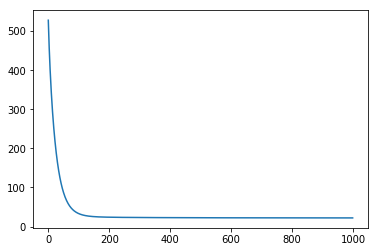

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cost_trace)

# Listing 2-18b. Linear Regression Actual House Price vs Predicted House Price 

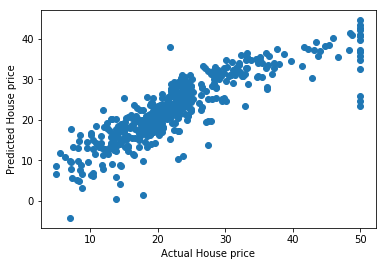

In [48]:
#----------------------------------------------------------------------------------------------

# Plot the Predicted house Prices vs the Actual House Prices

#----------------------------------------------------------------------------------------------

fig, ax = plt.subplots()
plt.scatter(Y_input,pred_)
ax.set_xlabel('Actual House price')
ax.set_ylabel('Predicted House price') 

# Listing 2-19. Multiclass Classification with Softmax function using Full Batch Gradient Descent 

In [49]:
#----------------------------------------------------------------------------------------------

# Import the required libraries

#---------------------------------------------------------------------------------------------- 

import tensorflow as tf
import numpy as np
from sklearn import datasets
from tensorflow.examples.tutorials.mnist import input_data



#----------------------------------------------------------------------------------------------

# Function to Read the MNIST dataset along with the labels

#---------------------------------------------------------------------------------------------- 

def read_infile():
    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    train_X, train_Y,test_X, test_Y = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
    return train_X, train_Y,test_X, test_Y

#----------------------------------------------------------------------------------------------

# Define the weights and biases for the neural network

#---------------------------------------------------------------------------------------------- 

def weights_biases_placeholder(n_dim,n_classes):
    X = tf.placeholder(tf.float32,[None,n_dim])
    Y = tf.placeholder(tf.float32,[None,n_classes])
    w = tf.Variable(tf.random_normal([n_dim,n_classes],stddev=0.01),name='weights')
    b = tf.Variable(tf.random_normal([n_classes]),name='weights')
    return X,Y,w,b

#----------------------------------------------------------------------------------------------

# Define the forward pass

#---------------------------------------------------------------------------------------------- 

def forward_pass(w,b,X):
    out = tf.matmul(X,w) + b
    return out 

#----------------------------------------------------------------------------------------------

# Define the cost function for the softmax unit

#---------------------------------------------------------------------------------------------- 

def multiclass_cost(out,Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out,labels=Y))
    return cost

#----------------------------------------------------------------------------------------------

# Define the initialiazation op

#---------------------------------------------------------------------------------------------- 

def init():
    return tf.global_variables_initializer()

#----------------------------------------------------------------------------------------------

# Define the training op

#---------------------------------------------------------------------------------------------- 
    
def train_op(learning_rate,cost):
    op_train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    return op_train
    


train_X, train_Y,test_X, test_Y = read_infile()
X,Y,w,b = weights_biases_placeholder(train_X.shape[1],train_Y.shape[1])
out = forward_pass(w,b,X)
cost = multiclass_cost(out,Y)
learning_rate,epochs = 0.01,1000
op_train = train_op(learning_rate,cost)
init = init()
loss_trace = []
accuracy_trace = []

#----------------------------------------------------------------------------------------------

# Activate the Tensorflow session and execute the Stochastic gradient descent

#---------------------------------------------------------------------------------------------- 


with tf.Session() as sess:
    sess.run(init)
    
    for i in xrange(epochs):
        sess.run(op_train,feed_dict={X:train_X,Y:train_Y})
        loss_ = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
        accuracy_ = np.mean(np.argmax(sess.run(out,feed_dict={X:train_X,Y:train_Y}),axis=1) == np.argmax(train_Y,axis=1))
        loss_trace.append(loss_)
        accuracy_trace.append(accuracy_)
        if (((i+1) >= 100) and ((i+1) % 100 == 0 )) :
            print 'Epoch:',(i+1),'loss:',loss_,'accuracy:',accuracy_
                            
    print 'Final training result:','loss:',loss_,'accuracy:',accuracy_    
    loss_test = sess.run(cost,feed_dict={X:test_X,Y:test_Y})
    test_pred = np.argmax(sess.run(out,feed_dict={X:test_X,Y:test_Y}),axis=1)
    accuracy_test = np.mean(test_pred == np.argmax(test_Y,axis=1))
    print 'Results on test dataset:','loss:',loss_test,'accuracy:',accuracy_test    
    

    
    

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 100 loss: 1.61233 accuracy: 0.658818181818
Epoch: 200 loss: 1.24327 accuracy: 0.753472727273
Epoch: 300 loss: 1.04145 accuracy: 0.788018181818
Epoch: 400 loss: 0.917034 accuracy: 0.806836363636
Epoch: 500 loss: 0.832832 accuracy: 0.818527272727
Epoch: 600 loss: 0.771862 accuracy: 0.827054545455
Epoch: 700 loss: 0.725474 accuracy: 0.833545454545
Epoch: 800 loss: 0.688842 accuracy: 0.839054545455
Epoch: 900 loss: 0.659069 accuracy: 0.843727272727
Epoch: 1000 loss: 0.634311 accuracy: 0.847763636364
Final training result: loss: 0.634311 accuracy: 0.847763636364
Results on test dataset: loss: 0.608456 accuracy: 0.8567


# Listing 2-19a. Display the Actual digits vs the Predicted digits along with the images of the actual digits 

Actual digits:    [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 4 1 4 9 6 9]
Actual images of the digits follow:


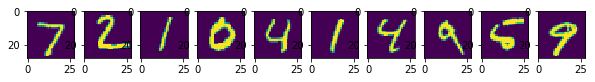

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(1, 10, figsize=(10, 2))
print 'Actual digits:   ', np.argmax(test_Y[0:10],axis=1)
print 'Predicted digits:',test_pred[0:10]
print 'Actual images of the digits follow:'
for i in range(10):
        a[i].imshow(np.reshape(test_X[i],(28, 28)))

# Listing 2-20. Multiclass Classification with Softmax function using Stochastic Gradient Descent 

In [42]:
def read_infile():
    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    train_X, train_Y,test_X, test_Y = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
    return train_X, train_Y,test_X, test_Y


def weights_biases_placeholder(n_dim,n_classes):
    X = tf.placeholder(tf.float32,[None,n_dim])
    Y = tf.placeholder(tf.float32,[None,n_classes])
    w = tf.Variable(tf.random_normal([n_dim,n_classes],stddev=0.01),name='weights')
    b = tf.Variable(tf.random_normal([n_classes]),name='weights')
    return X,Y,w,b

def forward_pass(w,b,X):
    out = tf.matmul(X,w) + b
    return out 

def multiclass_cost(out,Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out,labels=Y))
    return cost

def init():
    return tf.global_variables_initializer()
    
    
def train_op(learning_rate,cost):
    op_train = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    return op_train
    


train_X, train_Y,test_X, test_Y = read_infile()
X,Y,w,b = weights_biases_placeholder(train_X.shape[1],train_Y.shape[1])
out = forward_pass(w,b,X)
cost = multiclass_cost(out,Y)
learning_rate,epochs,batch_size = 0.01,1000,1000
num_batches = train_X.shape[0]/batch_size
op_train = train_op(learning_rate,cost)
init = init()
epoch_cost_trace = []
epoch_accuracy_trace = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in xrange(epochs):
        epoch_cost,epoch_accuracy = 0,0
   
        for j in xrange(num_batches):
            sess.run(op_train,feed_dict={X:train_X[j*batch_size:(j+1)*batch_size],Y:train_Y[j*batch_size:(j+1)*batch_size]})
            actual_batch_size = train_X[j*batch_size:(j+1)*batch_size].shape[0]
            epoch_cost += actual_batch_size*sess.run(cost,feed_dict={X:train_X[j*batch_size:(j+1)*batch_size],Y:train_Y[j*batch_size:(j+1)*batch_size]})
            
            
        epoch_cost = epoch_cost/float(train_X.shape[0])
        epoch_accuracy = np.mean(np.argmax(sess.run(out,feed_dict={X:train_X,Y:train_Y}),axis=1) == np.argmax(train_Y,axis=1))
        epoch_cost_trace.append(epoch_cost)
        epoch_accuracy_trace.append(epoch_accuracy)
        
        if (((i +1) >= 100) and ((i+1) % 100 == 0 )) :
            print 'Epoch:',(i+1),'Average loss:',epoch_cost,'accuracy:',epoch_accuracy
                            
    print 'Final epoch training results:','Average loss:',epoch_cost,'accuracy:',epoch_accuracy
    loss_test = sess.run(cost,feed_dict={X:test_X,Y:test_Y})
    test_pred = np.argmax(sess.run(out,feed_dict={X:test_X,Y:test_Y}),axis=1)
    accuracy_test = np.mean(test_pred == np.argmax(test_Y,axis=1))
    print 'Results on test dataset:','Average loss:',loss_test,'accuracy:',accuracy_test    
    

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 100 Average loss: 0.217315986888 accuracy: 0.938909090909
Epoch: 200 Average loss: 0.212252810056 accuracy: 0.939781818182
Epoch: 300 Average loss: 0.21044576737 accuracy: 0.940036363636
Epoch: 400 Average loss: 0.209570910985 accuracy: 0.940236363636
Epoch: 500 Average loss: 0.209083208171 accuracy: 0.940509090909
Epoch: 600 Average loss: 0.208780150793 accuracy: 0.940636363636
Epoch: 700 Average loss: 0.208576056226 accuracy: 0.940618181818
Epoch: 800 Average loss: 0.208429297805 accuracy: 0.940672727273
Epoch: 900 Average loss: 0.208318462426 accuracy: 0.9408
Epoch: 1000 Average loss: 0.208231372183 accuracy: 0.940872727273
Final epoch training results: Average loss: 0.208231372183 accuracy: 0.940872727273
Results on test dataset: Average loss: 0.459081 accuracy: 0.9155


# Listing 2-20a. Actual Digit vs Predicted digits for Softmax classification through Stochastic Gradient descent 

Actual digits:    [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 4 1 4 9 6 9]
Actual images of the digits follow:


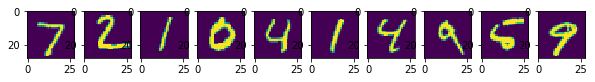

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(1, 10, figsize=(10, 2))
print 'Actual digits:   ', np.argmax(test_Y[0:10],axis=1)
print 'Predicted digits:',test_pred[0:10]
print 'Actual images of the digits follow:'
for i in range(10):
        a[i].imshow(np.reshape(test_X[i],(28, 28)))